In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.set_printoptions(suppress=True)
import toml
import pandas as pd
import cv2
import sys
from utils import utils
import matplotlib.pyplot as plt
import imageio.v3 as iio
import sleap_io as sio
from utils.keypoint_renderer import KeypointRenderer

In [2]:
# annotations_path = "/Users/mustafashaikh/3d-gui/test_videos/single_frame_annotations.csv"
annotations_path = "/Users/main/Documents/GitHub/3d-gui/test_videos/single_frame_annotations.csv"
# calib_data_path = "/Users/mustafashaikh/Documents/salk/3d/data/slap_2m/calibration.toml"
calib_data_path = "/Users/main/Documents/GitHub/3d-gui/test_videos/calibration.toml"
# targets_path = "/Users/mustafashaikh/Documents/salk/3d/data/slap_2m/targets_data.npy"
targets_path = "/Volumes/talmo/mustafa/sleap3d-experiments/notebooks/targets_data.npy"
orig_vid_path = "/Users/main/Documents/GitHub/3d-gui/test_videos/side.mp4"
labels_path = "/Users/main/Documents/GitHub/3d-gui/test_videos/labels.v001.slp"
vid_path = "/Users/main/Documents/GitHub/3d-gui/test_videos/side.mp4"

In [3]:
targets = np.load(targets_path)
labels = sio.load_slp(labels_path)

In [28]:
T = utils.compute_global_coordinate_frame(
    calib_data_path=calib_data_path,
    annotations_path=annotations_path
)
targets_global = utils.register_to_global_frame(targets, T)

In [5]:
# modify the edges so that it makes a mouse shape
edges = [
    (0,2), # nose to left ear
    (0,1), # nose to right ear
    (2,5), # left ear to head
    (1,5), # right ear to head
    (5,12), # head to haunch right
    (5,13), # head to haunch left
    (12,3), # haunch right to TTI
    (13,3), # haunch left to TTI
    (6,3), # trunk to TTI
    (3,7), # TTI to tail 0
    (7,8), # tail 0 to tail 1
    (8,9), # tail 1 to tail 2
]
# original edges
# labels.skeletons[0].edge_inds

In [ ]:
vid = iio.imiter(vid_path)
renderer = KeypointRenderer(targets_global, edges, T)
renderer.set_style(node_size=50,edge_width=4, alpha=0.9)
fig, ax = renderer.create_3d_plot(figsize=(12, 10),title=f"3D Mouse Pose - Frame 0",
view_elev=45,view_azim=45)
for frame_idx in range(targets_global.shape[0]):
    renderer.update_3d_plot(frame_idx, show_labels=False, show_coordinate_axes=True)

KeyboardInterrupt: 

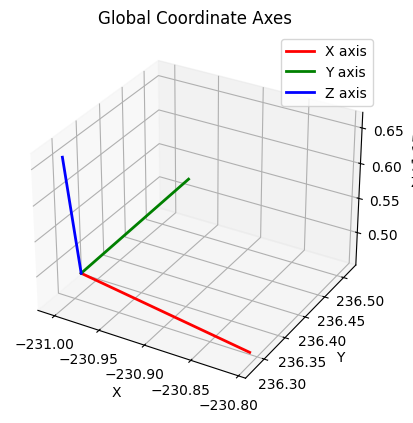

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw the origin
origin = t

# Draw the axes as lines: each column of R is a direction vector
axis_length = 0.2  # adjust as needed for visualization

# X axis (red) - draw as a line
x_end = origin + axis_length * R[:, 0]
ax.plot([origin[0], x_end[0]], [origin[1], x_end[1]], [origin[2], x_end[2]], 
        color='r', linewidth=2, label='X axis')

# Y axis (green) - draw as a line  
y_end = origin + axis_length * R[:, 1]
ax.plot([origin[0], y_end[0]], [origin[1], y_end[1]], [origin[2], y_end[2]], 
        color='g', linewidth=2, label='Y axis')

# Z axis (blue) - draw as a line
z_end = origin + axis_length * R[:, 2]
ax.plot([origin[0], z_end[0]], [origin[1], z_end[1]], [origin[2], z_end[2]], 
        color='b', linewidth=2, label='Z axis')

# Optionally, plot the triangulated points for context
# ax.scatter(pts_3d[:, 0], pts_3d[:, 1], pts_3d[:, 2], c='k', s=10, alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Global Coordinate Axes')
ax.legend()
plt.show()